## Dataset : Airbnb Singapore Dataset from InsideAirbnb
Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/

### EDA on Middle 23 Variables in dataset  
The purpose of this file is to conduct exploratory data analysis on the middle 23 variables in our dataset.  
### Done by: <b>Isaac Chun</b>

---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [590]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
sb.set() #Set the default seaborn style for graphics

### Additional Libraries

Import additional libraries

> Wordcloud : Library to create tag clouds in Python  
> Folium : Plot a map visualization in Python  
> Geopandas : Handle geojson data to generate chloropelth maps

In [591]:
from wordcloud import WordCloud
import folium
import geopandas

---
# Features Description

This dataset contains 75 features about Airbnb listings within Singapore. This notebook encompasses the cleaning & exploration <br>data analysis (EDA) of the middle 23 features.
Below are the features with their respective descriptions</br>

26.  <b>host_has_profile_pic</b>: A binary variable if the host has a profile picture
27.  <b>host_identify_verified</b>: Whether the host has a verified identity
28.  <b>neighbourhood</b>: The general neighbourhood of the property listing
29.  <b>neighbourhood_cleansed</b>: The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
30.  <b>neighbourhood_group_cleansed</b>: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
31.  <b>latitude</b>: the latitude of this property
32.  <b>longitude</b>: the longitude of this property
33.  <b>property_type</b>: Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field
34.  <b>room_type</b>: All homes are grouped into the following room types: [Entire home/apt, Private room, Shared room, Hotel room]
35. <b>accommodates</b>: The maximum capacity of the listing
36. <b>bedrooms</b>: The number of bedrooms
37. <b>beds</b>: The number of bed(s)
38. <b>amenities</b>: The amenities in this hotel room
39. <b>price</b>: daily price in local currency
40. <b>minimum_nights</b>: minimum number of night stay for the listing 
41. <b>maximum_nights</b>: maximum number of night stay for the listing different)
42. <b>minimum_minimum_nights</b>: the smallest minimum_night value from the calender (looking 365 nights in the future)
42. <b>maximum_minimum_nights</b>: the largest minimum_night value from the calender (looking 365 nights in the future)
43. <b>minimum_maximum_nights</b>: the smallest maximum_night value from the calender (looking 365 nights in the future)
44. <b>maximum_maximum_nights</b>: the largest maximum_night value from the calender (looking 365 nights in the future)
45. <b>minimum_nights_avg_ntm</b>: the average minimum_night value from the calender (looking 365 nights in the future)
46. <b>maximum_nights_avg_ntm</b>: the average maximum_night value from the calender (looking 365 nights in the future)
47. <b>calendar_updated</b>: when was this listing updated

--- 
## Visual Data Cleaning

##### In the context of maximizing host profit, the following features can be dropped from the dataset as they provide no relevant insights for our predictions.

1.  **host_has_profile_pic** : Does not provide relevant insights to our predictions.
2.  **host_identity_verified** : We have another column that already shows the host's identification
3.  **neighbourhood** : We have another column that is more accurate in the csv, and this column is all just Singapore
4.  **bathrooms** : All the columns are blank.
5.  **minimum_minimum_nights** : Does not provide relevant insights to our predictions, and can be calculated by ourselves, both columns are the same.
6.  **maximum_minimum_nights** : Does not provide relevant insights to our predictions, and can be calculated by ourselves, both columns are the same.
7.  **minimum_maximum_nights** : Does not provide relevant insights to our predictions, and can be calculated by ourselves, both columns are the same.
8.  **maximum_maximum_nights** : Does not provide relevant insights to our predictions, and can be calculated by ourselves, both columns are the same.
9.  **minimum_nights_avg_ntm** : Does not provide relevant insights to our predictions, and can be calculated by ourselves, both columns are the same.
10. **maximum_nights_avg_ntm** : Does not provide relevant insights to our predictions, and can be calculated by ourselves, both columns are the same.
11. **calendar_updated** : All the columns are blank.
12. **room_type** : We can acquire insights for this row using property_type, so we will drop it.

---
### Below are features that we think might be informative for analyzing factors that impact host profit, so we shall conduct our EDA on them and gather insights:

1.  **neighbourhood_cleansed** : This may be helpful to determine which neighbourhood listings usually have higher price listings, so the hosts can maximise profits
2.  **neighbourhood_group_cleansed** : This may be helpful to determine which region has higher price listings or greater concentration of listings so the host can maximise profits
3.  **latitude** : The location of the house might matter when trying to maximise profits
4.  **longitude** : The location of the house might matter when trying to maximise profits
5.  **property_type** : The property type might affect the listing price of the house, so we have to conduct our own EDA to find out
6.  **accomodates** : Max number of accomodatees (stayers of the property) might affect house listing price
7. **beds** :Amount of beds might also matter and affect our host price listings
8. **amenities** : Total list of our amenities, so we shall conduct our EDA and see if theres a correlation
9. **price** : The price of the listing for relevant insights on the total price listing mean throughout Singapore.
10. **minimum_nights** : This is used to calculate our total profit as it is minimum nights, so we can calculate money earned by price * minimum_nights to gather our range of profit
11. **maximum_nights** : This is used to calculate our total profit as it is maximum nights, so we can calculate money earned by price * maximum_nights to gather our range of profit

In [592]:
def remove_outliers(df, columns, factor=1.5):
    # loop through each column and remove outliers based on the IQR method
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + factor * iqr
        lower_bound = q1 - factor * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [593]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

---

>## Import the Dataset

In [594]:
airDF = pd.read_csv("listings.csv")
airDF.head()

id                          listing_url     scrape_id last_scraped  \
0   71609.0   https://www.airbnb.com/rooms/71609  2.022120e+13   12/29/2022   
1   71896.0   https://www.airbnb.com/rooms/71896  2.022120e+13   12/29/2022   
2   71903.0   https://www.airbnb.com/rooms/71903  2.022120e+13   12/29/2022   
3  275343.0  https://www.airbnb.com/rooms/275343  2.022120e+13   12/29/2022   
4  275344.0  https://www.airbnb.com/rooms/275344  2.022120e+13   12/29/2022   

        source                                       name  \
0  city scrape        Ensuite Room (Room 1 & 2) near EXPO   
1  city scrape            B&B  Room 1 near Airport & EXPO   
2  city scrape                 Room 2-near Airport & EXPO   
3  city scrape  Amazing Room with window 10min to Redhill   
4  city scrape          15 mins to Outram MRT Single Room   

                                         description  \
0  For 3 rooms.Book room 1&2 and room 4<br /><br ...   
1  <b>The space</b><br />Vocational Stay Deluxe B...   
2  Like your own home, 24hrs access.<br /><br /><...   
3  Awesome location and host <br />Room near INSE...   
4  Lovely home for the special guest !<br /><br /...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  Quiet and view of the playground with exercise...   
3                                                NaN   
4       Bus stop <br />Food center <br />Supermarket   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/24453191/3580...   367042  ...   
1  https://a0.muscache.com/pictures/2440674/ac4f4...   367042  ...   
2  https://a0.muscache.com/pictures/568743/7bc623...   367042  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...  1439258  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...  1439258  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.78                   4.26                4.32   
1                        4.43                   4.17                4.04   
2                        4.64                   4.50                4.36   
3                        4.42                   4.53                4.63   
4                        4.54                   4.62                4.46   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              6   
1     NaN                t                              6   
2     NaN                f                              6   
3   S0399                f                             46   
4   S0399                f                             46   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           0   
3                                           2   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            6   
1                                            6   
2                                            6   
3                                           44   
4                                           44   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.15  
1                                           0              0.17  
2                                           0              0.33  
3                                           0              0.19  
4                                           0              0.11  

[5 rows x 75 columns]

In [595]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3035 non-null   float64
 1   listing_url                                   3035 non-null   object 
 2   scrape_id                                     3035 non-null   float64
 3   last_scraped                                  3035 non-null   object 
 4   source                                        3035 non-null   object 
 5   name                                          3035 non-null   object 
 6   description                                   2985 non-null   object 
 7   neighborhood_overview                         1973 non-null   object 
 8   picture_url                                   3035 non-null   object 
 9   host_id                                       3035 non-null   i

In [596]:
print(airDF.dtypes)

id                                              float64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


> ## Handle our map in folium for data visualization

In [597]:
#Plot all first
lat_mean = airDF["latitude"].mean()
long_mean = airDF["longitude"].mean()
area_lat_long = pd.concat([airDF["latitude"],airDF["longitude"]], axis = 1)
area_lat_long = area_lat_long.values.tolist()

In [598]:
geo = pd.read_csv("geodata.csv")
geo = geo.sort_values(by =["name"])
geo.reset_index(drop = True)
geo.head(n=5)

name  latitude   longitude
0    ANG MO KIO  1.369115  103.845434
1         BEDOK  1.323604  103.927341
2        BISHAN  1.352585  103.835212
31     BOON LAY  1.314289  103.708969
3   BUKIT BATOK  1.359029  103.763680

In [599]:
geojson = geopandas.read_file("sg.geojson")
geojson = geojson[['name','geometry']]
geojson.head(n=5)

name                                           geometry
0         BISHAN  POLYGON ((103.84924 1.36275, 103.84936 1.36268...
1    BUKIT BATOK  POLYGON ((103.76408 1.37001, 103.76444 1.36947...
2    BUKIT MERAH  POLYGON ((103.81740 1.29433, 103.81743 1.29431...
3  BUKIT PANJANG  POLYGON ((103.77445 1.39029, 103.77499 1.38607...
4    BUKIT TIMAH  POLYGON ((103.79766 1.34813, 103.79806 1.34779...

In [600]:
mapDF = geojson.merge(geo, left_on = "name", right_on = "name", how = "outer")
mapDF = mapDF[~mapDF['geometry'].isna()]
mapDF.head(n=10)

name                                           geometry  \
0                   BISHAN  POLYGON ((103.84924 1.36275, 103.84936 1.36268...   
1              BUKIT BATOK  POLYGON ((103.76408 1.37001, 103.76444 1.36947...   
2              BUKIT MERAH  POLYGON ((103.81740 1.29433, 103.81743 1.29431...   
3            BUKIT PANJANG  POLYGON ((103.77445 1.39029, 103.77499 1.38607...   
4              BUKIT TIMAH  POLYGON ((103.79766 1.34813, 103.79806 1.34779...   
5  CENTRAL WATER CATCHMENT  POLYGON ((103.80702 1.41126, 103.80754 1.40986...   
6                   CHANGI  POLYGON ((103.98236 1.39356, 103.98242 1.39349...   
7               CHANGI BAY  MULTIPOLYGON (((104.02076 1.32566, 104.02139 1...   
8            CHOA CHU KANG  POLYGON ((103.74660 1.40541, 103.74691 1.40540...   
9                 CLEMENTI  POLYGON ((103.75857 1.29929, 103.75831 1.29911...   

   latitude   longitude  
0  1.352585  103.835212  
1  1.359029  103.763680  
2  1.281905  103.823918  
3  1.377414  103.771950  
4  1.329411  103.802078  
5  1.355200  103.797200  
6  1.344953  103.982597  
7  1.322244  104.027783  
8  1.383980  103.746961  
9  1.316181  103.764938

In [601]:
#Create the map
map = folium.Map(
    #Center the map here at location
    location = [lat_mean, long_mean], zoom_start = 12
)
map

---
### 1. EDA on neighbourhood_cleansed
<b>neighbourhood_group_cleansed</b>: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.


In [602]:
neighbourhoodDF = pd.DataFrame(airDF["neighbourhood_cleansed"])
neighbourhoodDF

neighbourhood_cleansed
0                  Tampines
1                  Tampines
2                  Tampines
3               Bukit Merah
4               Bukit Merah
...                     ...
3030          Downtown Core
3031          Downtown Core
3032                  Bedok
3033       Southern Islands
3034       Southern Islands

[3035 rows x 1 columns]

In [603]:
neighbourhoodDF.describe()

neighbourhood_cleansed
count                    3035
unique                     42
top                   Kallang
freq                      353

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='Count'>

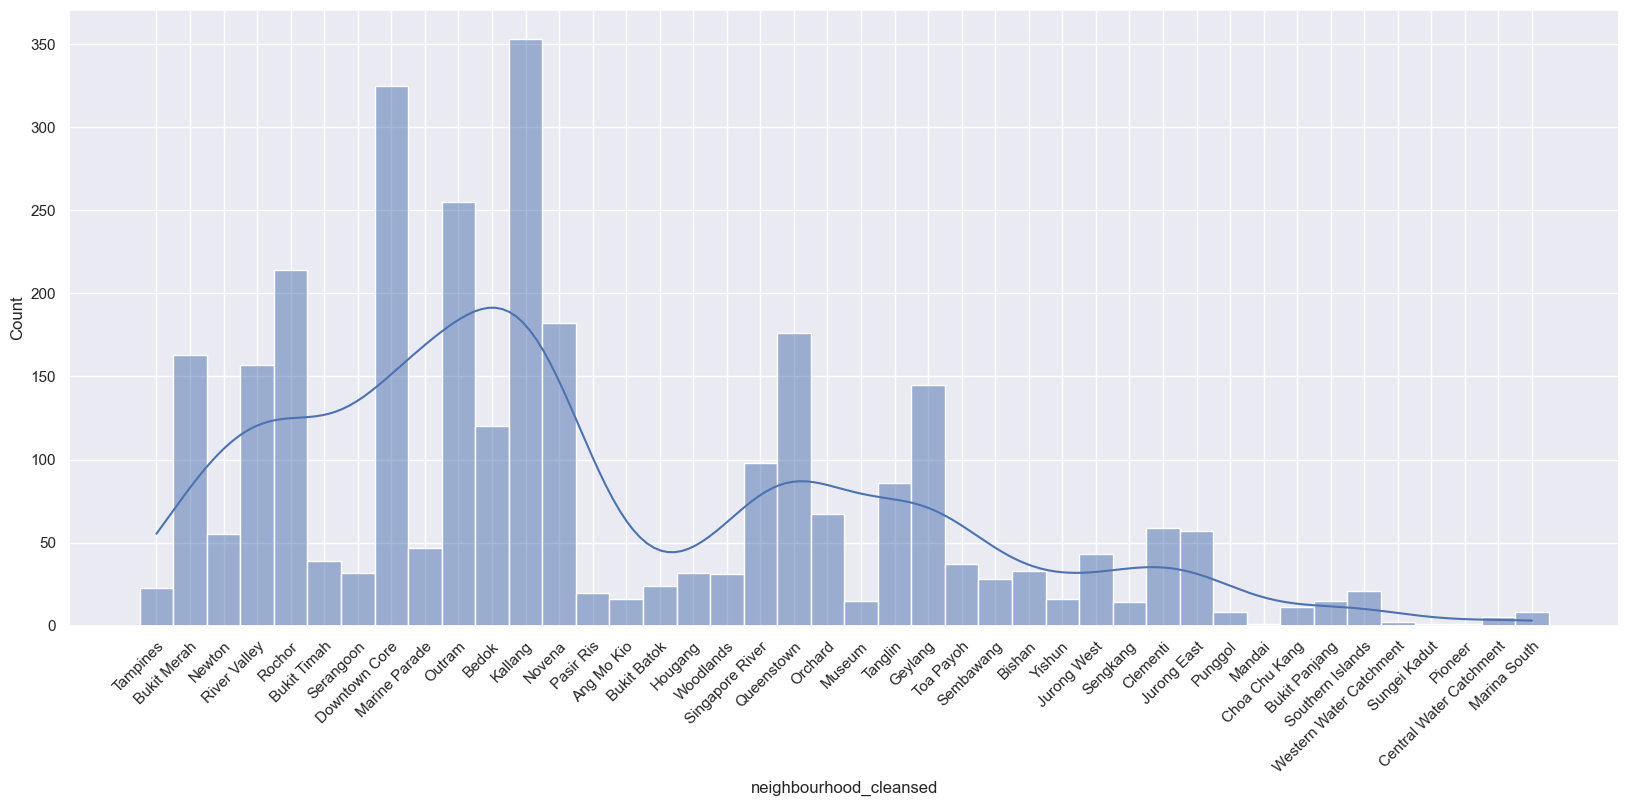

In [604]:
#Plot it against a histplot to see the results
f = plt.figure(figsize = (20,8))
plt.xticks(np.arange(0, len(neighbourhoodDF["neighbourhood_cleansed"].unique()), step=1))  # Set label locations.
plt.xticks(rotation =45, ha = "right", rotation_mode = "anchor")
sb.histplot(data = neighbourhoodDF["neighbourhood_cleansed"], kde = True)

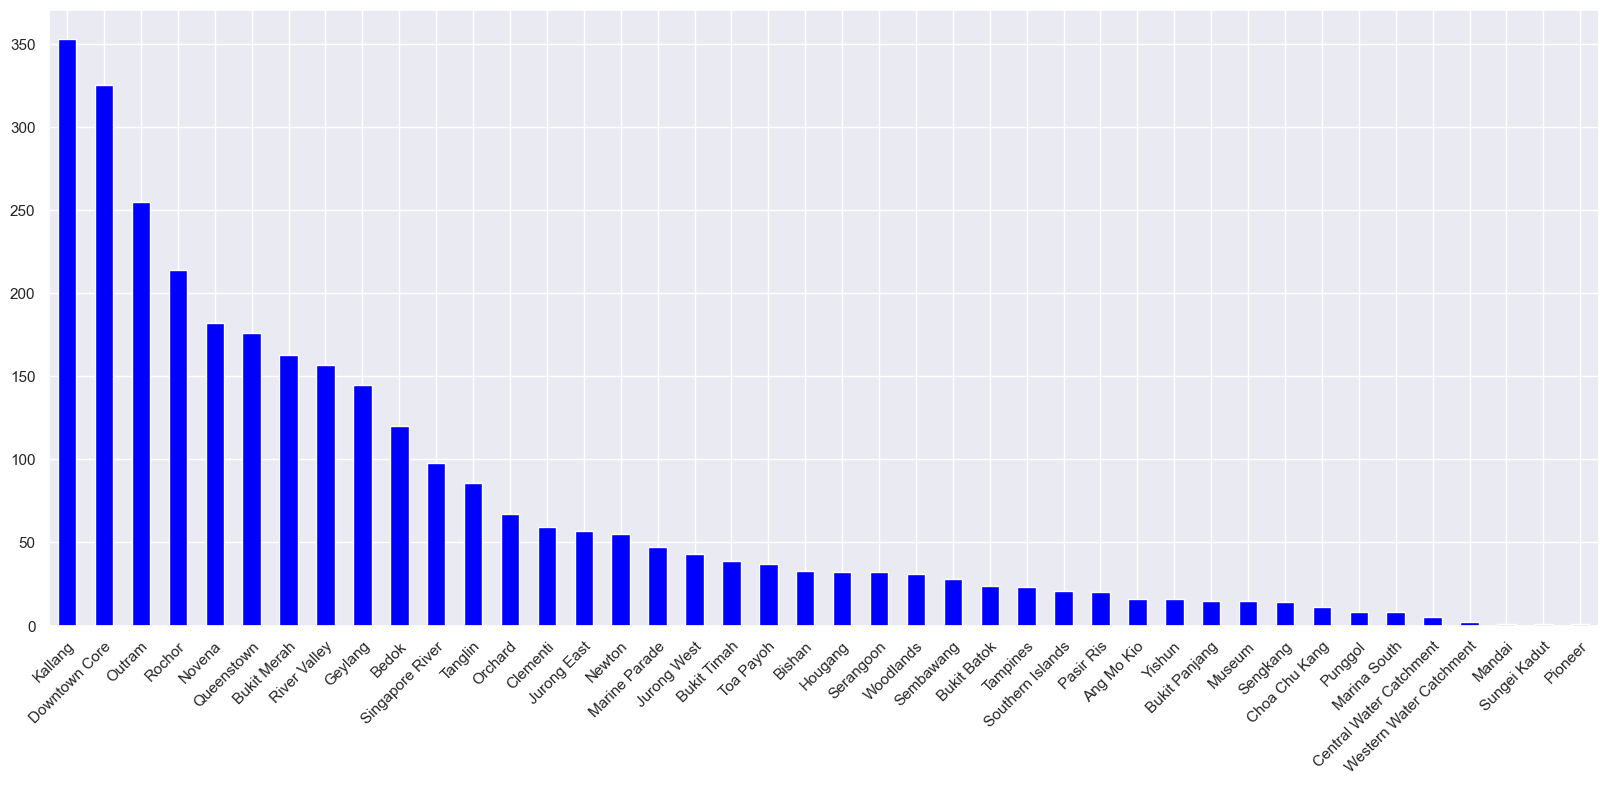

In [605]:
#Plot it against a different plot in ascending to see the results
f = plt.figure(figsize = (20,8))

neighbourhoodDF["neighbourhood_cleansed"].value_counts().plot(kind='bar',color=['blue'])
plt.xticks(np.arange(0, len(neighbourhoodDF["neighbourhood_cleansed"].unique()), step=1))  # Set label locations.
plt.xticks(rotation =45, ha = "right", rotation_mode = "anchor")
plt.show()
#sb.histplot(data = neighbourhoodDF["neighbourhood_cleansed"])

#### We can see that **Kallang** has the highest amount of listings, let us plot a map to see it with colors for better visualization

In [606]:
#Calculate the percentages and store it into a series
percentages = {}
numbers = {}
#Store keys
for x in mapDF["name"]:
    percentages[x] = 0
    numbers[x] = 0
#Then update all the values
for x in neighbourhoodDF["neighbourhood_cleansed"]:
    percentages[x.upper()] += 1
    numbers[x.upper()] += 1
    
#Calculate percentages
for key, item in percentages.items():
    percentages[key] = round((item/len(neighbourhoodDF["neighbourhood_cleansed"])*100),3)

percentages

{'BISHAN': 1.087,
 'BUKIT BATOK': 0.791,
 'BUKIT MERAH': 5.371,
 'BUKIT PANJANG': 0.494,
 'BUKIT TIMAH': 1.285,
 'CENTRAL WATER CATCHMENT': 0.165,
 'CHANGI': 0.0,
 'CHANGI BAY': 0.0,
 'CHOA CHU KANG': 0.362,
 'CLEMENTI': 1.944,
 'GEYLANG': 4.778,
 'NOVENA': 5.997,
 'PASIR RIS': 0.659,
 'PAYA LEBAR': 0.0,
 'SELETAR': 0.0,
 'SEMBAWANG': 0.923,
 'BEDOK': 3.954,
 'BOON LAY': 0.0,
 'SENGKANG': 0.461,
 'SERANGOON': 1.054,
 'ANG MO KIO': 0.527,
 'TENGAH': 0.0,
 'TOA PAYOH': 1.219,
 'WESTERN WATER CATCHMENT': 0.066,
 'YISHUN': 0.527,
 'DOWNTOWN CORE': 10.708,
 'MARINA EAST': 0.0,
 'NEWTON': 1.812,
 'ORCHARD': 2.208,
 'WOODLANDS': 1.021,
 'MARINA SOUTH': 0.264,
 'MUSEUM': 0.494,
 'HOUGANG': 1.054,
 'JURONG EAST': 1.878,
 'LIM CHU KANG': 0.0,
 'MANDAI': 0.033,
 'MARINE PARADE': 1.549,
 'NORTH-EASTERN ISLANDS': 0.0,
 'PIONEER': 0.033,
 'PUNGGOL': 0.264,
 'QUEENSTOWN': 5.799,
 'SOUTHERN ISLANDS': 0.692,
 'TUAS': 0.0,
 'JURONG WEST': 1.417,
 'KALLANG': 11.631,
 'SIMPANG': 0.0,
 'SUNGEI KADUT': 0.03

In [607]:
#Add our percentages into geo json
percentageMapDF = mapDF.copy()
#Set up new column
percentageMapDF["listingnumber"] = 0
percentageMapDF["percentage"] = 0

count = 0
#Add in according to name
for keys, value in percentages.items():
   percentageMapDF.loc[:,('percentage')][count] = value
   count += 1

count = 0
#Add in according to name
for keys, value in numbers.items():
   percentageMapDF.loc[:,('listingnumber')][count] = value
   count += 1

percentageMapDF.head(10)

C:\Users\Isaac\AppData\Local\Temp\ipykernel_29960\3005170940.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentageMapDF.loc[:,('percentage')][count] = value
C:\Users\Isaac\AppData\Local\Temp\ipykernel_29960\3005170940.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentageMapDF.loc[:,('listingnumber')][count] = value


name                                           geometry  \
0                   BISHAN  POLYGON ((103.84924 1.36275, 103.84936 1.36268...   
1              BUKIT BATOK  POLYGON ((103.76408 1.37001, 103.76444 1.36947...   
2              BUKIT MERAH  POLYGON ((103.81740 1.29433, 103.81743 1.29431...   
3            BUKIT PANJANG  POLYGON ((103.77445 1.39029, 103.77499 1.38607...   
4              BUKIT TIMAH  POLYGON ((103.79766 1.34813, 103.79806 1.34779...   
5  CENTRAL WATER CATCHMENT  POLYGON ((103.80702 1.41126, 103.80754 1.40986...   
6                   CHANGI  POLYGON ((103.98236 1.39356, 103.98242 1.39349...   
7               CHANGI BAY  MULTIPOLYGON (((104.02076 1.32566, 104.02139 1...   
8            CHOA CHU KANG  POLYGON ((103.74660 1.40541, 103.74691 1.40540...   
9                 CLEMENTI  POLYGON ((103.75857 1.29929, 103.75831 1.29911...   

   latitude   longitude  listingnumber  percentage  
0  1.352585  103.835212             33       1.087  
1  1.359029  103.763680             24       0.791  
2  1.281905  103.823918            163       5.371  
3  1.377414  103.771950             15       0.494  
4  1.329411  103.802078             39       1.285  
5  1.355200  103.797200              5       0.165  
6  1.344953  103.982597              0       0.000  
7  1.322244  104.027783              0       0.000  
8  1.383980  103.746961             11       0.362  
9  1.316181  103.764938             59       1.944

### Let us visualize the distribution on the map

In [608]:
#Create the map
map = folium.Map(
    #Center the map here at location
    location = [lat_mean, long_mean], zoom_start = 12.5
)
#Make choropleth map
choro_test = folium.Choropleth(geo_data = geojson,
            data = percentageMapDF,
            columns = ['name','listingnumber'],
            key_on = 'feature.properties.name',
            fill_color = 'BuPu', # colour of choropleth
            nan_fill_color = "White", # color for empty data
            fill_opacity = 0.6, #density of colour
            line_opacity = 0.5,
            line_color = 'black',
            legend_name= "Listings",
            nan_fill_opacity = 0.1).add_to(map)

#Then add some clickable markers
# add marker one by one on the map
for i in range(0,len(percentageMapDF)):
   folium.Marker(
      location=[percentageMapDF.iloc[i]['latitude'], percentageMapDF.iloc[i]['longitude']],
      popup= percentageMapDF.iloc[i]['name'] + "\n Listings:" + str(percentageMapDF.iloc[i]['listingnumber']),
   ).add_to(map)

map

#### It is true that Kallang, Downtown Core and Outram has the highest proportion of hosues as compared to the others areas as highlighted heavily in purple.

---
### 2. EDA on neighbourhood_group_cleansed
<b>neighbourhood_group_cleansed</b>: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.


In [609]:
neighbourhoodGroupDF = pd.DataFrame(airDF["neighbourhood_group_cleansed"])
neighbourhoodGroupDF

neighbourhood_group_cleansed
0                     East Region
1                     East Region
2                     East Region
3                  Central Region
4                  Central Region
...                           ...
3030               Central Region
3031               Central Region
3032                  East Region
3033               Central Region
3034               Central Region

[3035 rows x 1 columns]

In [610]:
neighbourhoodGroupDF.describe()

neighbourhood_group_cleansed
count                          3035
unique                            5
top                  Central Region
freq                           2476

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='Count'>

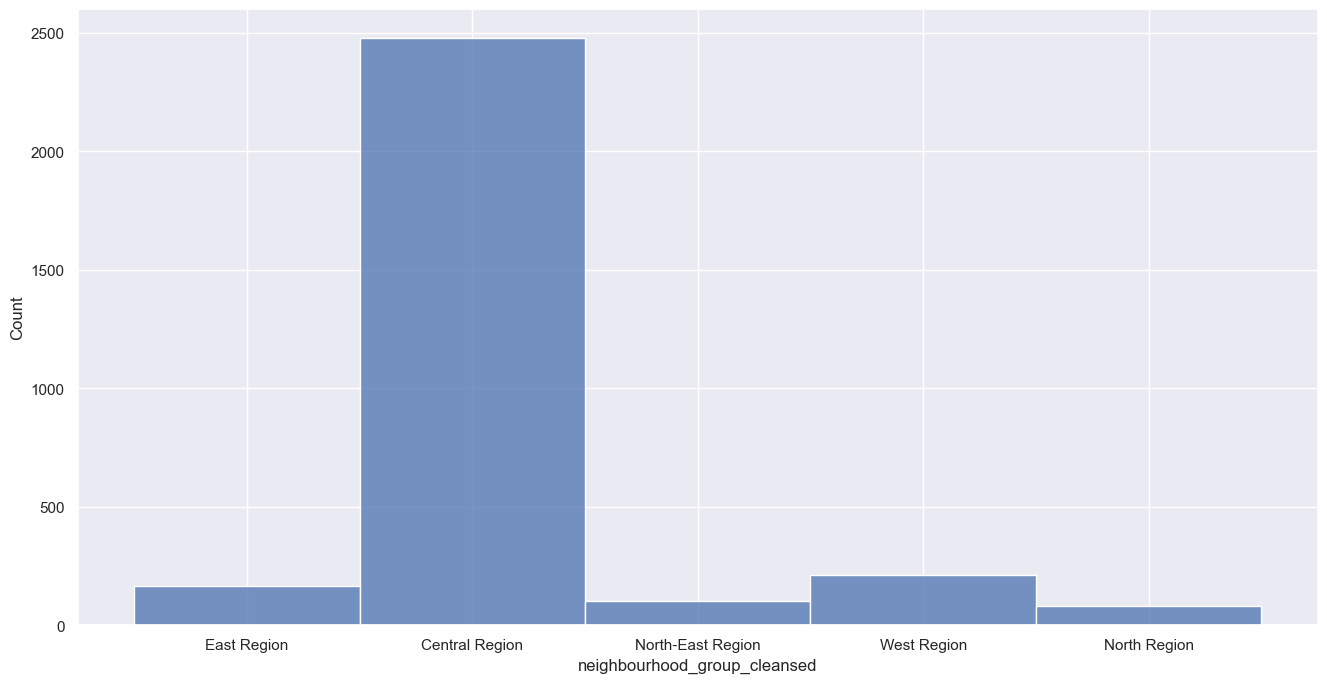

In [611]:
#Plot out a histogram to see the plots
f = plt.figure(figsize = (16,8))
sb.histplot(data = neighbourhoodGroupDF["neighbourhood_group_cleansed"])

#### We can see that there are many property listings in the central region as compared to the other regions like north east region or west region. This is probably due to the central region being closer as tourists attractions, so there is a higher amount of listings there.

---
### 3. EDA on latitude and longitude
<b>latitude</b>: the latitude of this property  
<b>longitude</b>: the longitude of this property

In [612]:
latlongDF = pd.DataFrame(airDF[["latitude","longitude"]])
latlongDF

latitude   longitude
0     1.345370  103.958870
1     1.347540  103.959580
2     1.345310  103.961000
3     1.290150  103.808140
4     1.288360  103.811440
...        ...         ...
3030  1.281098  103.859833
3031  1.282450  103.857881
3032  1.329067  103.913455
3033  1.257238  103.821381
3034  1.245557  103.839889

[3035 rows x 2 columns]

In [613]:
latlongDF.describe()

latitude    longitude
count  3035.000000  3035.000000
mean      1.309683   103.843008
std       0.031663     0.041012
min       1.245557   103.678810
25%       1.286445   103.834025
50%       1.304540   103.846770
75%       1.317520   103.859725
max       1.453280   103.977662

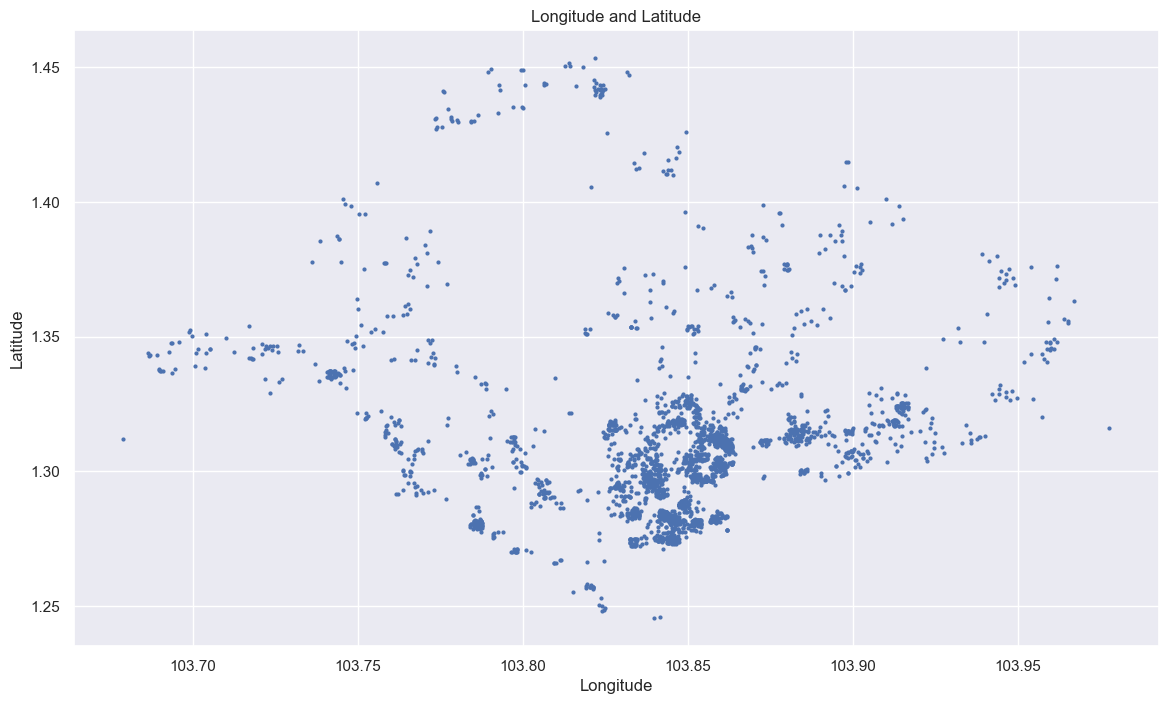

In [614]:
#Plot out the lat long of our in a plot to see the distribution of points
f = plt.figure(figsize = (14,8))
ax = f.add_subplot(1, 1, 1)

# Plot the data
ax.plot(latlongDF["longitude"], latlongDF["latitude"] ,marker='o', markersize=2, linestyle='')

# Set the title and axis labels
ax.set_title('Longitude and Latitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

### Lets visualize this onto our map to see our properties

In [615]:
#Create the map
map = folium.Map(
    #Center the map here at location
    location = [lat_mean, long_mean], zoom_start = 12.5
)
#Make choropleth map
choro_test = folium.Choropleth(geo_data = geojson,
            data = percentageMapDF,
            columns = ['name','listingnumber'],
            key_on = 'feature.properties.name',
            fill_color = 'BuPu', # colour of choropleth
            nan_fill_color = "White", # color for empty data
            fill_opacity = 0.6, #density of colour
            line_opacity = 0.5,
            line_color = 'black',
            legend_name= "Listings",
            nan_fill_opacity = 0.1).add_to(map)

#Add our lat long points
#Plot all points
for point in range(0, len(area_lat_long)):
  _ = folium.Circle(
      radius = 10,
      location =  area_lat_long[point],
      popup = "{0}, {1},{2} \n{3}\n{4}".format(airDF["name"][point], area_lat_long[point][0], area_lat_long[point][1], airDF["listing_url"][point], airDF["neighbourhood_cleansed"][point]),
      color = "crimson",
      fill = True,
      fill_opacity = 0.5).add_to(map)

map

#### We can see a large number of points being concentrated in the central region, as well as Kallang, Downtown Core and Outram as shown in the EDA above, which can be good to cluster.

---
### 4. EDA on property_type
<b>property_type</b>: Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field

In [616]:
propertyTypeDF = pd.DataFrame(airDF["property_type"])
propertyTypeDF

property_type
0           Private room in villa
1            Private room in home
2            Private room in home
3     Private room in rental unit
4     Private room in rental unit
...                           ...
3030                Room in hotel
3031                Room in hotel
3032  Private room in rental unit
3033                Room in hotel
3034                         Boat

[3035 rows x 1 columns]

In [617]:
propertyTypeDF.describe()

property_type
count                          3035
unique                           52
top     Private room in rental unit
freq                            589

<AxesSubplot:xlabel='property_type', ylabel='Count'>

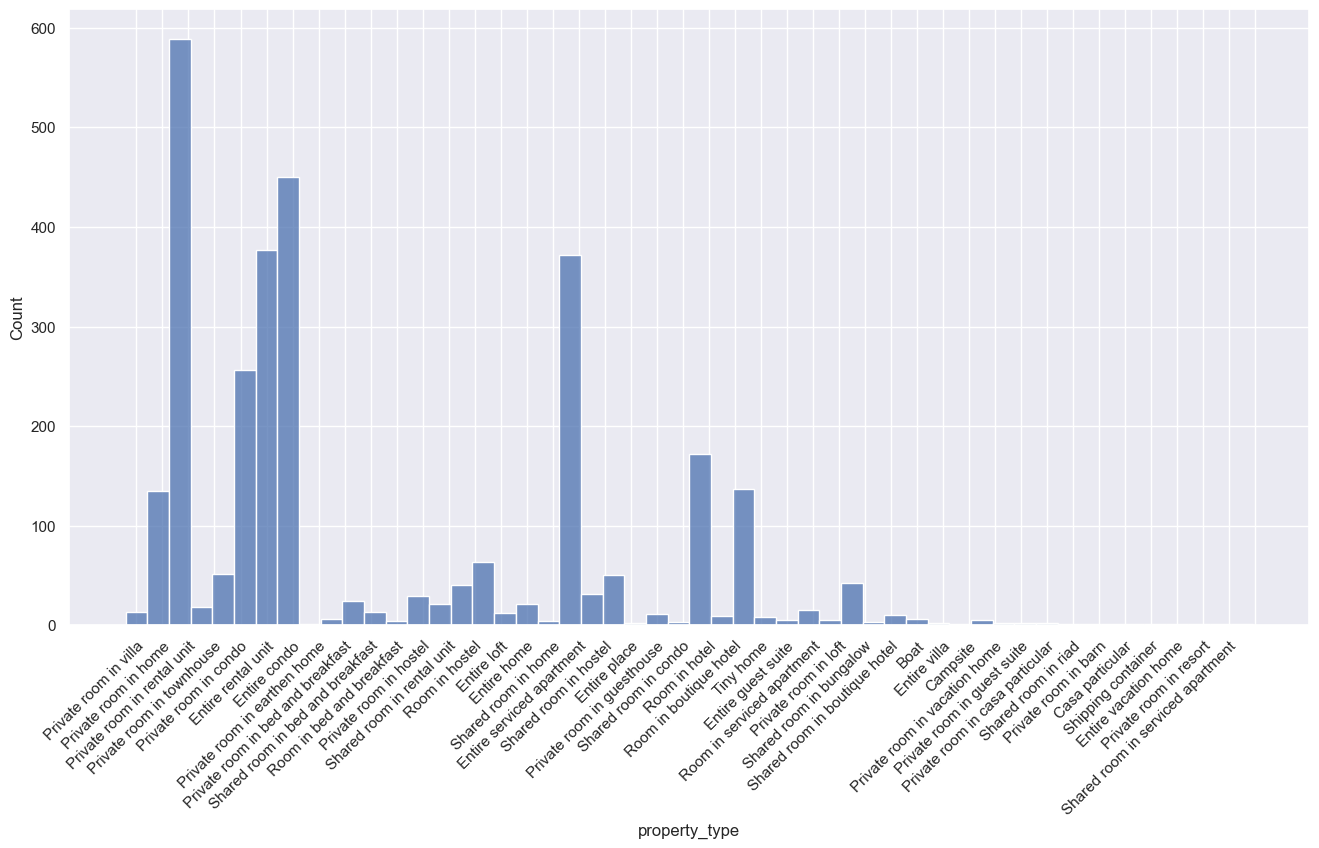

In [618]:
#Let us plot it to try to see and see if we can find any similarities
f = plt.figure(figsize = (16,8))
plt.xticks(np.arange(0, len(propertyTypeDF["property_type"].unique()), step=1.2))  # Set label locations.
plt.xticks(rotation = 45, ha = "right", rotation_mode = "anchor")
sb.histplot(data = propertyTypeDF["property_type"])

#### For property type, there are mainly three types, Private, Entire, Shared. The rest are either rooms in hostels or other niche categories. Let us group according to their categories to classify as one as we cannot work with so many different categories.

In [619]:
#Classify according to their first word up to the space
cleanedDF = pd.DataFrame(propertyTypeDF["property_type"])
count = 0
for x in cleanedDF["property_type"]:
    #Split this
    cleanedDF["property_type"].iloc[count] = cleanedDF["property_type"].iloc[count].split(" ", 1)[0]
    count += 1

cleanedDF

property_type
0          Private
1          Private
2          Private
3          Private
4          Private
...            ...
3030          Room
3031          Room
3032       Private
3033          Room
3034          Boat

[3035 rows x 1 columns]

In [620]:
cleanedDF.value_counts()

property_type
Entire           1248
Private          1216
Room              437
Shared            117
Tiny                8
Boat                6
Campsite            1
Casa                1
Shipping            1
dtype: int64

<AxesSubplot:xlabel='property_type', ylabel='Count'>

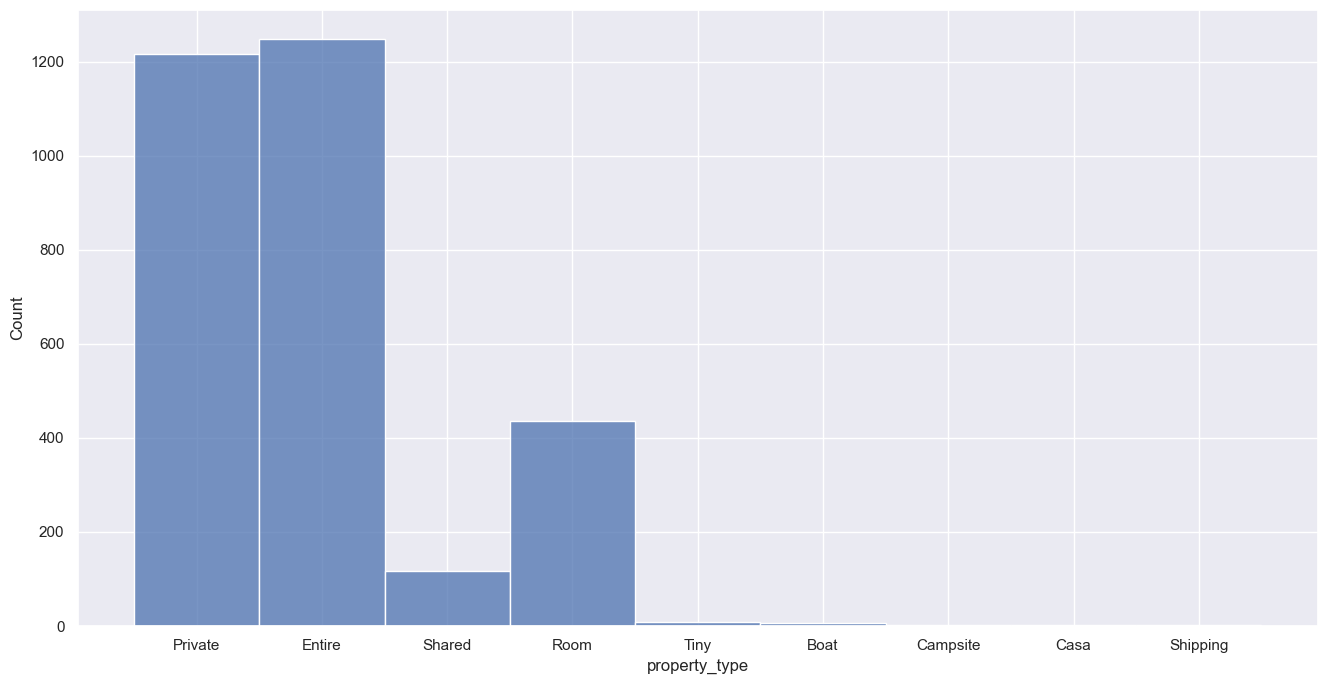

In [621]:
#Let us plot it to try to see and see if we can find any similarities
f = plt.figure(figsize = (16,8))
sb.histplot(data = cleanedDF["property_type"])

### Drop all the outliers

In [622]:
dropStrings = ["Tiny", "Boat", "Campsite", "Casa", "Shipping"]
df = cleanedDF.copy()
df = df[df.property_type.isin(dropStrings) == False]
df

property_type
0          Private
1          Private
2          Private
3          Private
4          Private
...            ...
3029       Private
3030          Room
3031          Room
3032       Private
3033          Room

[3018 rows x 1 columns]

In [623]:
df.describe()

property_type
count           3018
unique             4
top           Entire
freq            1248

<AxesSubplot:xlabel='property_type', ylabel='Count'>

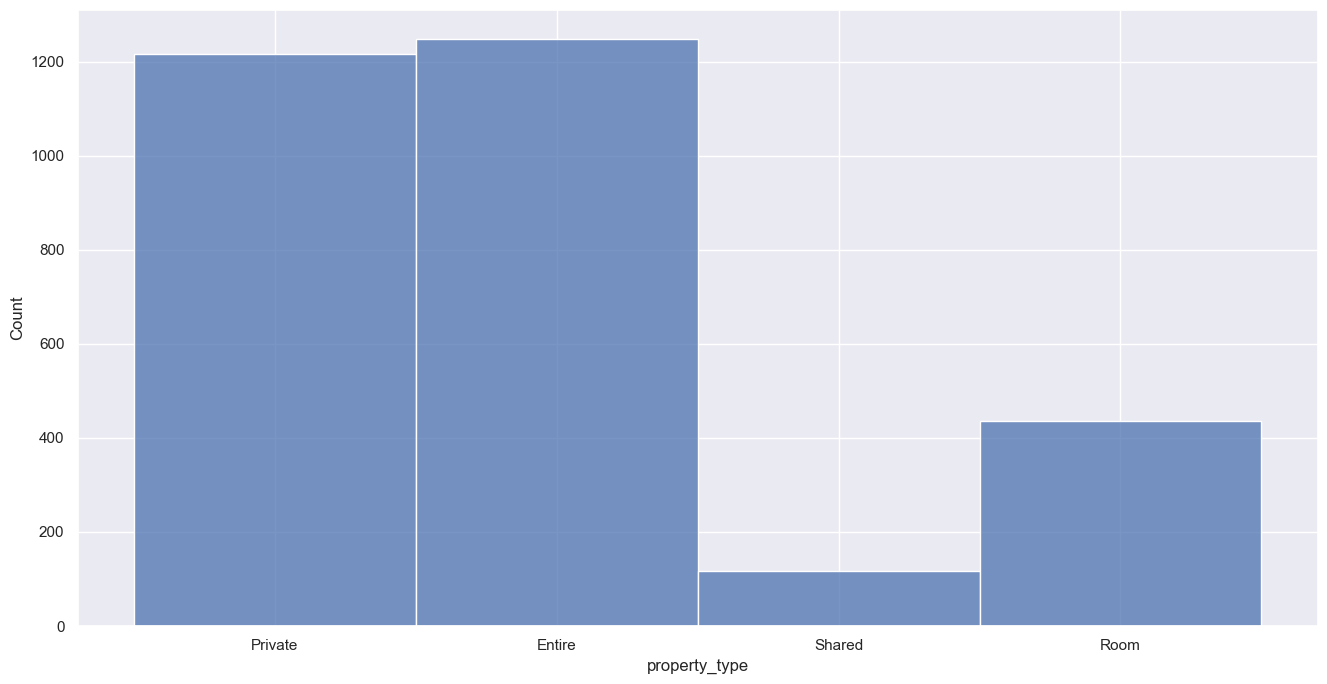

In [624]:
#Plot our updated df
f = plt.figure(figsize = (16,8))
sb.histplot(data = df["property_type"])

#### This representation is easier to be classified as we just need the type of room, reducing it to 4 categories.

---
### 5. EDA on accomodates
<b>accommodates</b>: The maximum capacity of the listing

In [625]:
accomodateDF = pd.DataFrame(airDF["accommodates"])
accomodateDF

accommodates
0                6
1                1
2                2
3                1
4                1
...            ...
3030             3
3031             3
3032             2
3033             4
3034             4

[3035 rows x 1 columns]

In [626]:
accomodateDF.describe()

accommodates
count   3035.000000
mean       2.816145
std        2.225978
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       16.000000

<AxesSubplot:>

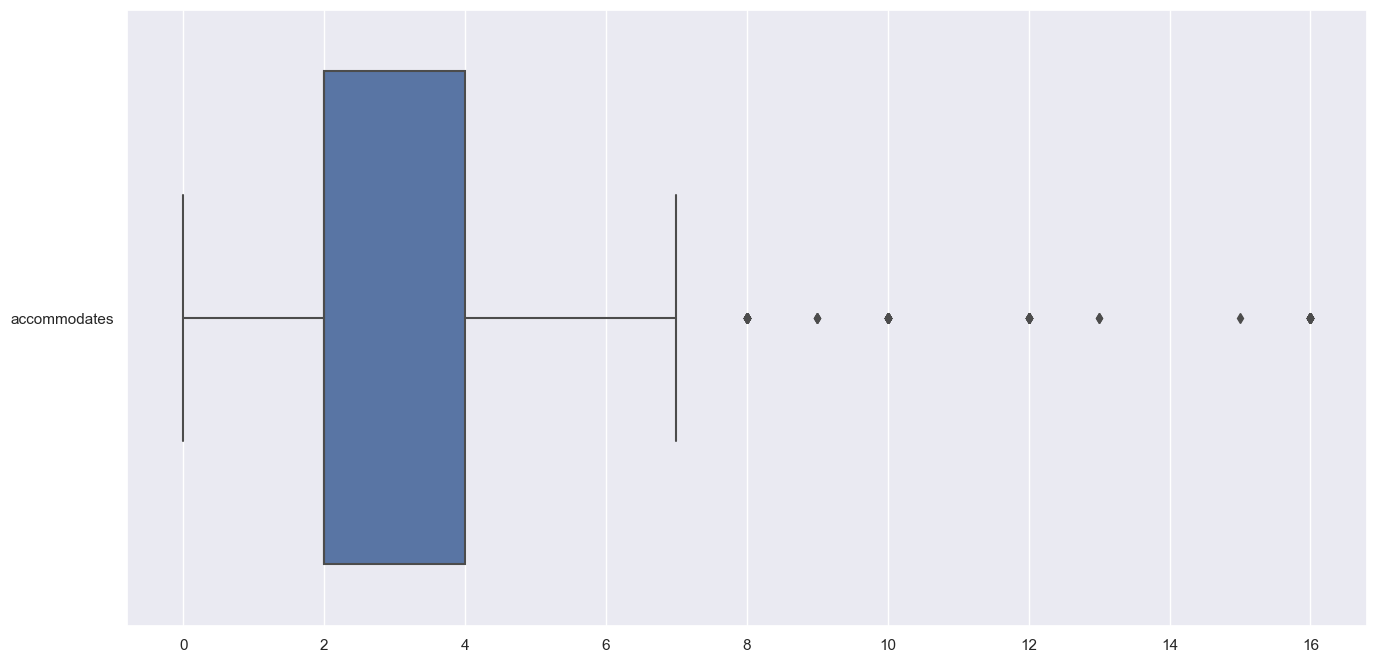

In [627]:
#Plot a boxplot first
f = plt.figure(figsize=(16,8))
sb.boxplot(data = accomodateDF, orient= 'h')

<AxesSubplot:ylabel='Count'>

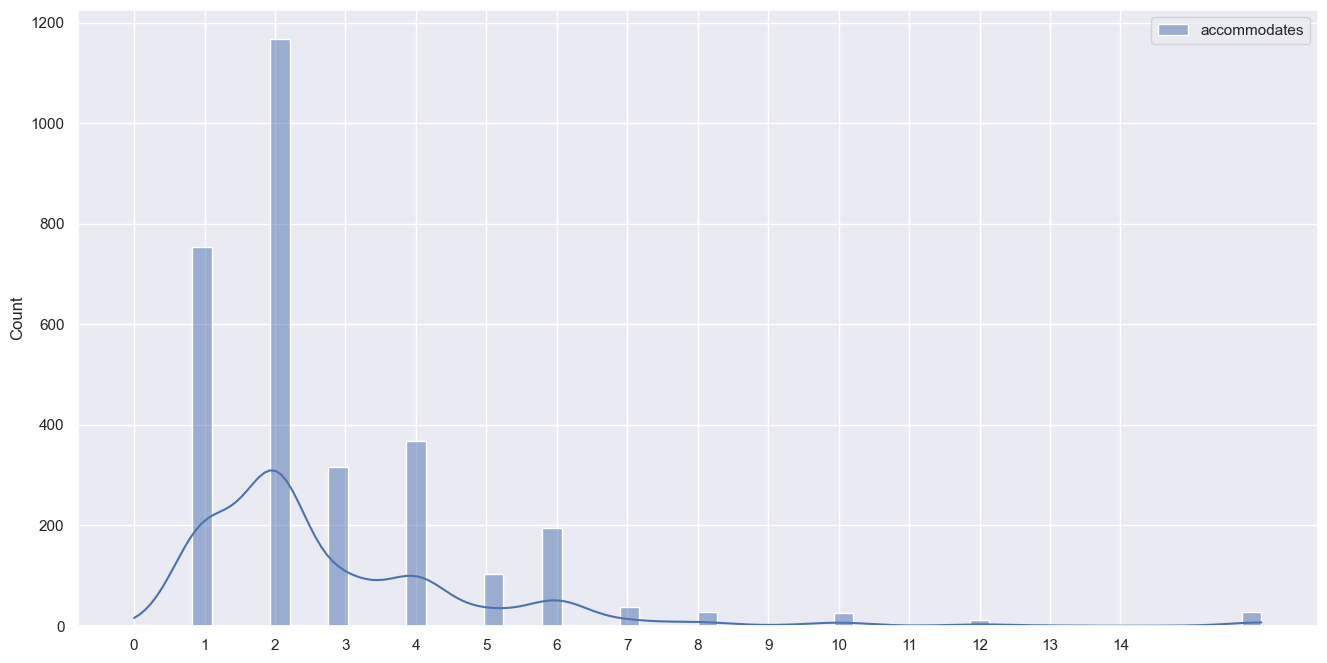

In [628]:
#Plot a boxplot first
f = plt.figure(figsize=(16,8))
plt.xticks(np.arange(0, len(accomodateDF["accommodates"].unique()), step=1))  # Set label locations.
sb.histplot(data = accomodateDF, kde = True)

In [629]:
accomodateDF = remove_outliers(accomodateDF, ["accommodates"])
accomodateDF

accommodates
0                6
1                1
2                2
3                1
4                1
...            ...
3030             3
3031             3
3032             2
3033             4
3034             4

[2938 rows x 1 columns]

<AxesSubplot:>

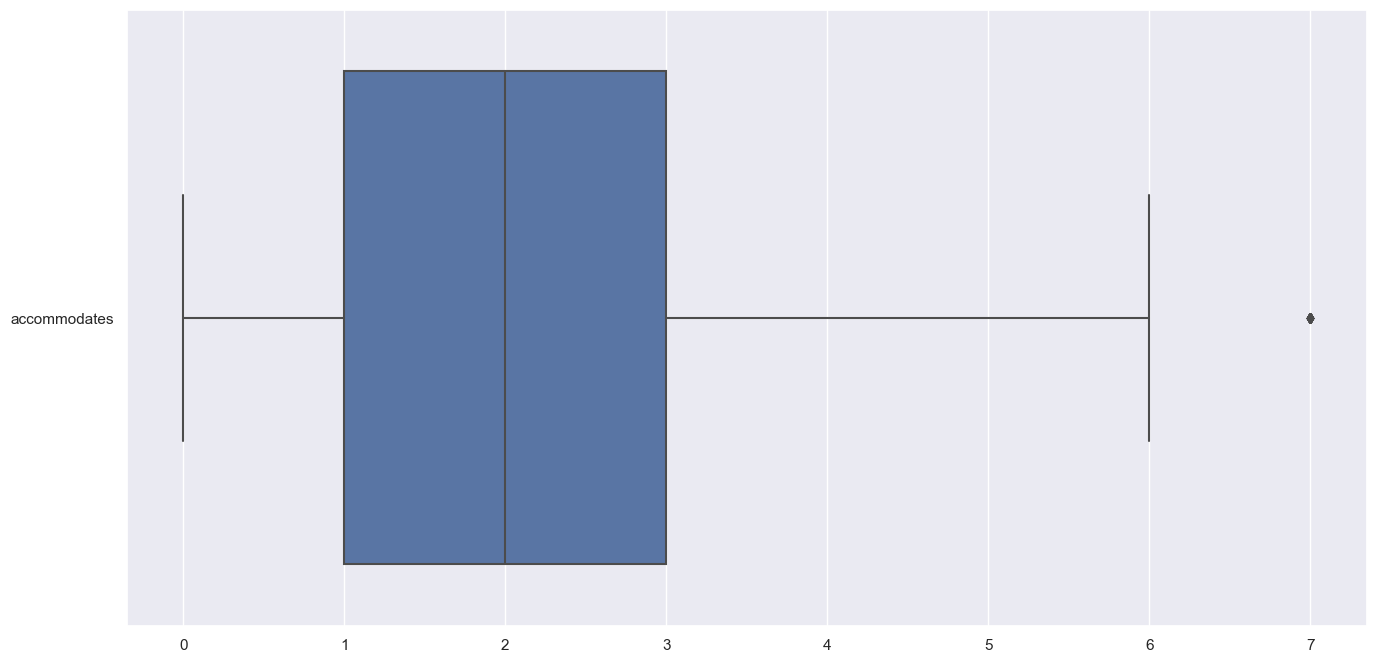

In [630]:
#Plot a boxplot first
f = plt.figure(figsize=(16,8))
sb.boxplot(data = accomodateDF, orient= 'h')

<AxesSubplot:ylabel='Count'>

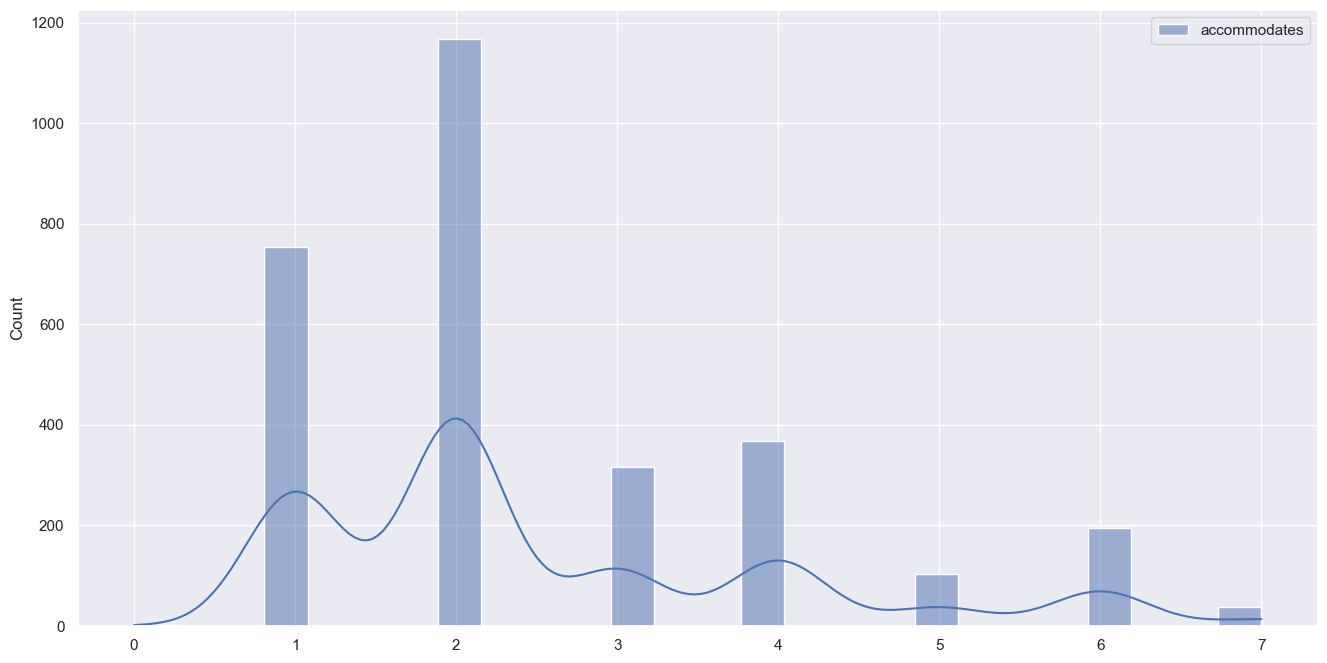

In [631]:
#Plot a boxplot first
f = plt.figure(figsize=(16,8))
plt.xticks(np.arange(0, len(accomodateDF["accommodates"].unique()), step=1))  # Set label locations.
sb.histplot(data = accomodateDF, kde = True)

#### Generally, most listings have around 1-4 accomodates that can stay at a listing at a time.

---
### 6. EDA on bedrooms
<b>bedrooms</b>: The number of bedrooms


In [632]:
bedroomDF = pd.DataFrame(airDF["bedrooms"])
bedroomDF

bedrooms
0          2.0
1          1.0
2          1.0
3          1.0
4          1.0
...        ...
3030       1.0
3031       1.0
3032       1.0
3033       1.0
3034       2.0

[3035 rows x 1 columns]

---
### 7. EDA on beds
<b>beds</b>: The number of bed(s)


---
### 8. EDA on amenities
<b>amenities</b>: The amenities in this hotel room


---
### 9. EDA on price
<b>price</b>: daily price in local currency


---
### 10. EDA on minimum_nights
<b>minimum_nights</b>: minimum number of night stay for the listing 


---
### 11. EDA on maximum_nights
<b>maximum_nights</b>: maximum number of night stay for the listing
